<a href="https://colab.research.google.com/github/aurorarch/Doodle-y/blob/main/Doodle_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset from Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle
!pwd

/content/gdrive/My Drive/Kaggle
/content/gdrive/My Drive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification

# From Google Cloud Storage

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/labelmanager/values/undelete.py
google-cloud-sdk/lib/surface/lifesciences/__init__.py
google-cloud-sdk/lib/surface/lifesciences/locations/__init__.py
google-cloud-sdk/lib/surface/lifesciences/locations/describe.yaml
google-cloud-sdk/lib/surface/lifesciences/locations/list.yaml
google-cloud-sdk/lib/surface/lifesciences/operations/__init__.py
google-cloud-sdk/lib/surface/lifesciences/operations/cancel.yaml
google-cloud-sdk/lib/surface/lifesciences/operations/describe.yaml
google-cloud-sdk/lib/surface/lifesciences/operations/list.yaml
google-cloud-sdk/lib/surface/lifesciences/operations/wait.py
google-cloud-sdk/lib/surface/lifesciences/pipelines/__init__.py
google-cloud-sdk/lib/surface/lifesciences/pipelines/run.py
google-cloud-sdk/lib/surface/logging/__init__.py
google-cloud-sdk/lib/surface/logging/buckets/__init__.py
google-cloud-sdk/lib/surface/logging/buckets/create.py
google-cloud-sdk/lib/surface/logging/

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: pulkit.pk7@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] pulkit.pk7@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [pulkit.pk7@gmail.com].

Pick cloud project to use: 
 [1] doodle-rec

In [ ]:
!mkdir data

In [ ]:
cd /content/data

/content/data


In [ ]:
!gsutil cp gs://quickdraw_dataset/full/numpy_bitmap/airplane.npy .

Copying gs://quickdraw_dataset/full/numpy_bitmap/airplane.npy...
\ [1 files][113.4 MiB/113.4 MiB]                                                
Operation completed over 1 objects/113.4 MiB.                                    


In [ ]:
download_list = ['bicycle','bear','cake','moon','calendar','calculator','dragon','door','fan','fish','candle','lion','snowflake']

for each in download_list:
  link = 'gs://quickdraw_dataset/full/numpy_bitmap/'+each+'.npy'
  !gsutil cp $link .

Copying gs://quickdraw_dataset/full/numpy_bitmap/bicycle.npy...
\ [1 files][ 94.6 MiB/ 94.6 MiB]                                                
Operation completed over 1 objects/94.6 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/bear.npy...
\ [1 files][100.8 MiB/100.8 MiB]                                                
Operation completed over 1 objects/100.8 MiB.                                    
Copying gs://quickdraw_dataset/full/numpy_bitmap/cake.npy...
\ [1 files][ 93.4 MiB/ 93.4 MiB]                                                
Operation completed over 1 objects/93.4 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/moon.npy...
\ [1 files][ 91.0 MiB/ 91.0 MiB]                                                
Operation completed over 1 objects/91.0 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/calendar.npy...
- [1 files][240.7 MiB/240.7 MiB]    

In [ ]:
!pwd

/content/data


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = np.load('calculator.npy')
data.shape

(128375, 784)

In [ ]:
x=data[88].reshape(28,28)

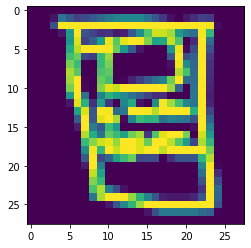

In [ ]:
plt.imshow(x)

In [ ]:
import os

count=0
train_data = []
label_list = ['airplane','bicycle','bear','cake','moon','calendar','calculator','dragon','door','fan','fish','candle','lion','snowflake']

for each in os.listdir():
  df = np.load(each)
  label_name = each.split('.')[0]

  for i in range(df.shape[0]):
    try:
      resized_array = df[i].reshape(28,28)
      class_name = label_list.index(label_name)
      train_data.append([resized_array,class_name])
      count += 1
    except Exception as e:
      pass

In [ ]:
count

2003913

In [ ]:
np.shape(train_data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(2003913, 2)

calendar


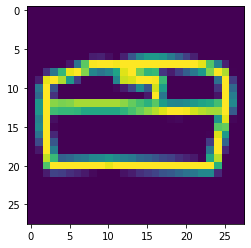

In [ ]:
plt.imshow(train_data[16542][0])
print(label_list[train_data[16542][1]])

In [ ]:
import random

random.shuffle(train_data)

In [ ]:
X = []
y = []

for features, labels in train_data:
  X.append(features)
  y.append(labels)

print(len(X))
print(len(y))

2003913
2003913


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.1)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, random_state=0, test_size=0.2)

In [ ]:
print(len(train_x))
print(len(train_y))
print(len(val_x))
print(len(val_y))
print(len(test_x))
print(len(test_y))

1442816
1442816
360705
360705
200392
200392


In [ ]:
type(train_x)

list

In [ ]:
train_x = np.reshape(train_x, (len(train_x), 28, 28, 1))
val_x = np.reshape(val_x, (len(val_x), 28, 28, 1))
test_x = np.reshape(test_x, (len(test_x), 28, 28, 1))

In [ ]:
train_y = np.asarray(train_y, dtype=np.int32)
val_y = np.asarray(val_y, dtype=np.int32)
test_y = np.asarray(test_y, dtype=np.int32)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)
print(test_x.shape)
print(test_y.shape)

(1442816, 28, 28, 1)
(1442816,)
(360705, 28, 28, 1)
(360705,)
(200392, 28, 28, 1)
(200392,)


In [ ]:
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

num_of_classes = 14
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_of_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
hist = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=5, batch_size=64, callbacks=callbacks_list)

Epoch 1/5
22544/22544 [==============================] - 77s 3ms/step - loss: 0.8873 - accuracy: 0.7484 - val_loss: 0.3712 - val_accuracy: 0.8891

Epoch 00001: val_accuracy improved from -inf to 0.88909, saving model to weights-improvement-01-0.89.hdf5
Epoch 2/5
22544/22544 [==============================] - 68s 3ms/step - loss: 0.4520 - accuracy: 0.8738 - val_loss: 0.3745 - val_accuracy: 0.8894

Epoch 00002: val_accuracy improved from 0.88909 to 0.88938, saving model to weights-improvement-02-0.89.hdf5
Epoch 3/5
22544/22544 [==============================] - 69s 3ms/step - loss: 0.4415 - accuracy: 0.8779 - val_loss: 0.3580 - val_accuracy: 0.8948

Epoch 00003: val_accuracy improved from 0.88938 to 0.89483, saving model to weights-improvement-03-0.89.hdf5
Epoch 4/5
22544/22544 [==============================] - 68s 3ms/step - loss: 0.4387 - accuracy: 0.8791 - val_loss: 0.3483 - val_accuracy: 0.8975

Epoch 00004: val_accuracy improved from 0.89483 to 0.89745, saving model to weights-impr

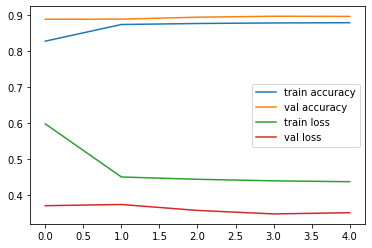

In [ ]:
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test_x, test_y, batch_size=128)
results

1566/1566 [==============================] - 4s 2ms/step - loss: 0.3494 - accuracy: 0.8988


[0.34943172335624695, 0.8988282680511475]

In [ ]:
model.save('QuickDraw.h5')

In [ ]:
!mkdir test

In [ ]:
cd test

/content/data/test


In [ ]:
!wget "https://i.pinimg.com/originals/71/21/aa/7121aa96a9829e67afa53b8271b9ac57.jpg"

--2021-02-19 07:43:17--  https://i.pinimg.com/originals/71/21/aa/7121aa96a9829e67afa53b8271b9ac57.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.40.84, 2600:1409:12:3ae::1931, 2600:1409:12:382::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.40.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12366 (12K) [image/jpeg]
Saving to: ‘7121aa96a9829e67afa53b8271b9ac57.jpg’

7121aa96a9829e67afa 100%[===================>]  12.08K  --.-KB/s    in 0.001s  

2021-02-19 07:43:17 (16.4 MB/s) - ‘7121aa96a9829e67afa53b8271b9ac57.jpg’ saved [12366/12366]



In [ ]:
def preprocess(image):
  image_x=28
  image_y=28
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (image_x, image_y))
  img = np.array(img, dtype=np.float32)
  img = np.reshape(img, (-1, image_x, image_y, 1))
  print(img.shape)
  return img

In [ ]:
test_image = preprocess("/content/data/test/7121aa96a9829e67afa53b8271b9ac57.jpg")

(1, 28, 28, 1)


In [ ]:
def pred(img):
  print("processed: " + str(img.shape))
  pred_probab = model.predict(img)[0]
  pred_class = list(pred_probab).index(max(pred_probab))
  print(label_list[pred_class])

In [ ]:
pred(test_image)

processed: (1, 28, 28, 1)
calendar


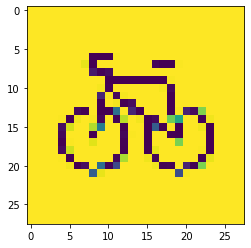

In [ ]:
plt.imshow(test_image.reshape(28,28))

In [ ]:
np.shape(test_x[3])

(28, 28, 1)

bicycle


'bicycle'

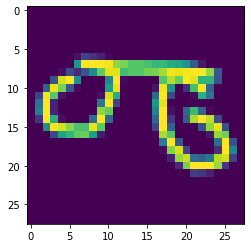

In [ ]:
x = test_x[113135]
y = test_y[113135]
print(label_list[int(y)])
x = np.reshape(x,(-1,28,28,1))
plt.imshow(x.reshape(28,28))

pred_probab = model.predict(x)[0]
pred_class = list(pred_probab).index(max(pred_probab))

label_list[pred_class]